In [40]:
import numpy as np
import matplotlib as plt

from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit import *

In [41]:

secret_key='1100'
n=len(secret_key)

In [42]:
qc=QuantumCircuit(n+1,n)
for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()

#this will be our oracle
for ii, yesno in enumerate(reversed(secret_key)):
    if yesno == '1':
        qc.cx(ii,len(secret_key))
# qc.cx(5,6)
# qc.cx(2,6)
qc.barrier()
for i in range(n):
    qc.h(i)
#qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
qc.measure(range(len(secret_key)),range(len(secret_key)))


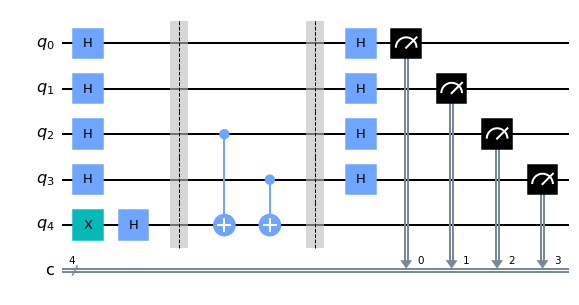

In [43]:
qc.draw(output="mpl")

In [44]:
sim = Aer.get_backend('qasm_simulator')
result=execute(qc, backend= sim, shots=1).result()
counts=result.get_counts()
print(counts)

{'1100': 1}


In [45]:
#running it on the actual machine
# IBMQ.load_account()
# provider=IBMQ.get_provider(hub='ibm-q')
# provider.backend()
# backend = least_busy(filters = lambda x : x.configuration().n_qubits <=7)
# print("least busy backend: ",backend)
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 7 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-05-15 02:30:59,648: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [46]:
from qiskit.tools.monitor import job_monitor
shots = 1024
transpile_qc=transpile(qc, backend)
job = backend.run(transpile_qc, shots = shots)
job_monitor(job, interval = 2)

Job Status: job has successfully run


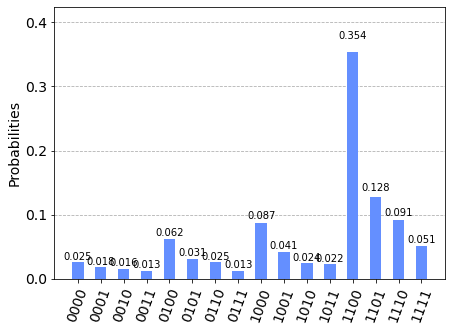

In [47]:
# import basic plot tools


results = job.result()
ans=results.get_counts()
plot_histogram(ans)